# Ejercicio 4: Modelo Probabilístico

## Objetivo de la práctica
- Comprender los componentes del modelo vectorial mediante cálculos manuales y observación directa.
- Aplicar el modelo de espacio vectorial con TF-IDF para recuperar documentos relevantes.
- Comparar la recuperación con BM25 frente a TF-IDF.
- Analizar visualmente las diferencias entre los modelos.
- Evaluar si los rankings generados son consistentes con lo que considerarías documentos relevantes.

## Parte 0: Carga del Corpus

In [16]:
#activar entorno virtual .\venv\Scripts\activate
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
newsgroupsdocs = newsgroups.data

## Parte 1: Cálculo de TF, DF, IDF y TF-IDF

### Actividad 
1. Utiliza el corpus cargado.


In [17]:
#Numero de Documentos
print(len(newsgroupsdocs))


18846


In [18]:
total_bytes = sum(len(doc.encode('utf-8')) for doc in newsgroupsdocs)
print(f"Tamaño total del corpus: {total_bytes / (1024*1024):.2f} MB")

#print(newsgroupsdocs[0][:1000])

Tamaño total del corpus: 21.02 MB


2. Construye la matriz de términos (TF)


In [19]:
#Mi forma
terminos = set()

for doc in newsgroupsdocs:
    doc = doc.split()  # separa el texto en palabras usando espacios
    for termino in doc:
        terminos.add(termino.lower())  # opcional: pasar a minúsculas para normalizar


print(len(terminos))

terminos = sorted(list(terminos))





260121


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(newsgroupsdocs)  # transforma todo el corpus a matriz TF
terminos = vectorizer.get_feature_names_out()  # array con las palabras únicas
print(f"Número de términos únicos: {len(terminos)}")

print(terminos)


Número de términos únicos: 134410
['00' '000' '0000' ... '³ation' 'ýé' 'ÿhooked']


In [21]:
import pandas as pd

X_denso = X[:10].toarray()

df = pd.DataFrame(X_denso, columns=terminos)

print(df.head())


   00  000  0000  00000  000000  00000000  0000000004  00000000b  00000001  \
0   0    0     0      0       0         0           0          0         0   
1   0    0     0      0       0         0           0          0         0   
2   0    0     0      0       0         0           0          0         0   
3   0    0     0      0       0         0           0          0         0   
4   0    0     0      0       0         0           0          0         0   

   00000001b  ...  zzs  zzvsi  zzy_3w  zzz  zzzoh  zzzzzz  zzzzzzt  ³ation  \
0          0  ...    0      0       0    0      0       0        0       0   
1          0  ...    0      0       0    0      0       0        0       0   
2          0  ...    0      0       0    0      0       0        0       0   
3          0  ...    0      0       0    0      0       0        0       0   
4          0  ...    0      0       0    0      0       0        0       0   

   ýé  ÿhooked  
0   0        0  
1   0        0  
2   0      

Calcula la frecuencia de documentos (DF)

In [22]:
import numpy as np

# Cada columna en X es un término. Comprobamos en cuántos documentos aparece cada término (DF)
df = np.sum(X > 0, axis=0)

# Lo convertimos a una lista plana
df = np.array(df).flatten()

# Obtenemos los términos
terminos = vectorizer.get_feature_names_out()

# Mostramos DF de los 10 primeros términos
for termino, freq in zip(terminos[:10], df[:10]):
    print(f"{termino}: aparece en {freq} documentos")


00: aparece en 402 documentos
000: aparece en 455 documentos
0000: aparece en 10 documentos
00000: aparece en 7 documentos
000000: aparece en 1 documentos
00000000: aparece en 2 documentos
0000000004: aparece en 2 documentos
00000000b: aparece en 1 documentos
00000001: aparece en 1 documentos
00000001b: aparece en 1 documentos


3. Calcula TF-IDF utilizando sklearn.


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(newsgroupsdocs)

4. Visualiza los valores en un DataFrame para analizar las diferencias entre los términos.

In [24]:
import pandas as pd

# Obtener los términos
terminos = vectorizer.get_feature_names_out()

# Convertir solo los primeros 5 documentos a formato denso
df = pd.DataFrame(tfidf[:5].toarray(), columns=terminos)

# Mostrar las primeras filas/columnas
print(df.iloc[:, :10])  # primeras 10 columnas


    00  000  0000  00000  000000  00000000  0000000004  00000000b  00000001  \
0  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0       0.0   
1  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0       0.0   
2  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0       0.0   
3  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0       0.0   
4  0.0  0.0   0.0    0.0     0.0       0.0         0.0        0.0       0.0   

   00000001b  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


## Parte 2: Ranking de documentos usando TF-IDF

### Actividad 

1. Dada una consulta, construye el vector de consulta


In [25]:
query = ["jesus"]
query_vect = vectorizer.transform(query)

2. Calcula la similitud coseno entre la consulta y cada documento usando los vectores TF-IDF


In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Compara el vector de consulta con todos los vectores de documentos
similaridades = cosine_similarity(query_vect, tfidf)

type(similaridades)



numpy.ndarray

3. Genera un ranking de los documentos ordenados por relevancia.


In [27]:
import numpy as np
import pandas as pd

# Índices ordenados por similitud (mayor a menor)
ranking_tfidf = np.argsort(similaridades[0])[::-1]

print(ranking_tfidf)


[ 1268  6497 10843 ... 18818 18817 18834]


4. Muestra los resultados en una tabla.

In [28]:
top_k = 7 #ajustar

# Crear tabla con fragmentos cortos y largos
resultados = pd.DataFrame({
    "documento_index": ranking_tfidf[:top_k],
    "similitud": similaridades[0][ranking_tfidf[:top_k]],
    "preview_200": [newsgroupsdocs[i][:200] + "..." for i in ranking_tfidf[:top_k]],
    "primeras_lineas": [
        "\n".join(newsgroupsdocs[i].splitlines()[:10]) + "\n..."  # las primeras 10 líneas
        for i in ranking_tfidf[:top_k]
    ]
})



pd.set_option("display.max_colwidth", None)  # para que no corte las columnas
print(resultados)

print(newsgroupsdocs[6497])

   documento_index  similitud  \
0             1268   0.673618   
1             6497   0.542970   
2            10843   0.536197   
3              200   0.522024   
4            10358   0.461200   
5             6940   0.447763   
6             7801   0.443486   

                                                                                                                                                                                                            preview_200  \
0       Jesus isn't God ? When Jesus returns some people may miss Him ?  What version of\nthe Bible do you read Mike ?\n\nJesus is God incarnate (in flesh) . Jesus said, 'I and the Father are one.' \nJesus was ta...   
1  \n\nBrian K., guess what?  You missed the point.  On a scale from cold to\nhot, you are at 0 degrees Kelvin.\n\n\nThen as you understand it, what is it?\n\n\nYes.  I agree with that.  But what does that have t...   
2                  \n\tHmm...makes you wonder whether prayer "in Jesus' name" 

## Parte 3: Ranking con BM25

### Actividad 

1. Implementa un sistema de recuperación usando el modelo BM25.


In [33]:
#importamos la librería BM25
from rank_bm25 import BM25Okapi

In [34]:
#a nuestro objeto vecetorizer (ya entrenado) extraemos el corpus tokenizado
analyzer = vectorizer.build_analyzer()
tokenized_corpus = [analyzer(doc) for doc in newsgroupsdocs]
for i, doc in enumerate(newsgroupsdocs[:5]):
    tokens = analyzer(doc)
    print(f"Documento {i}: {tokens}")


Documento 0: ['am', 'sure', 'some', 'bashers', 'of', 'pens', 'fans', 'are', 'pretty', 'confused', 'about', 'the', 'lack', 'of', 'any', 'kind', 'of', 'posts', 'about', 'the', 'recent', 'pens', 'massacre', 'of', 'the', 'devils', 'actually', 'am', 'bit', 'puzzled', 'too', 'and', 'bit', 'relieved', 'however', 'am', 'going', 'to', 'put', 'an', 'end', 'to', 'non', 'pittsburghers', 'relief', 'with', 'bit', 'of', 'praise', 'for', 'the', 'pens', 'man', 'they', 'are', 'killing', 'those', 'devils', 'worse', 'than', 'thought', 'jagr', 'just', 'showed', 'you', 'why', 'he', 'is', 'much', 'better', 'than', 'his', 'regular', 'season', 'stats', 'he', 'is', 'also', 'lot', 'fo', 'fun', 'to', 'watch', 'in', 'the', 'playoffs', 'bowman', 'should', 'let', 'jagr', 'have', 'lot', 'of', 'fun', 'in', 'the', 'next', 'couple', 'of', 'games', 'since', 'the', 'pens', 'are', 'going', 'to', 'beat', 'the', 'pulp', 'out', 'of', 'jersey', 'anyway', 'was', 'very', 'disappointed', 'not', 'to', 'see', 'the', 'islanders', 'l

In [35]:
# Creamos el objeto BM25 con el corpus tokenizado
bm25 = BM25Okapi(tokenized_corpus)

2. Usa la misma consulta del ejercicio anterior.


In [36]:
query = "jesus"
tokenized_query = query.lower().split()


3. Calcula el score BM25 para cada documento y genera un ranking.


In [37]:
scores = bm25.get_scores(tokenized_query)

# Paso 5: Generar el ranking
ranking_bm25 = scores.argsort()[::-1]  # índices ordenados de mayor a menor score

# Paso 6: Crear la tabla con previews y primeras líneas
top_k = 7  

resultados = pd.DataFrame({
    "documento_index": ranking_bm25[:top_k],
    "score_bm25": [scores[i] for i in ranking_bm25[:top_k]],
    "preview_200": [newsgroupsdocs[i][:200] + "..." for i in ranking_bm25[:top_k]],
    "primeras_lineas": [
        "\n".join(newsgroupsdocs[i].splitlines()[:10]) + "\n..."
        for i in ranking_bm25[:top_k]
    ]
})

# Para que pandas no recorte las columnas
pd.set_option("display.max_colwidth", None)

# Mostrar la tabla
print(resultados)


   documento_index  score_bm25  \
0             1268    8.407652   
1             6497    8.056525   
2            16971    8.023306   
3             9000    7.998475   
4            10843    7.971170   
5             9744    7.880255   
6            10358    7.815677   

                                                                                                                                                                                                            preview_200  \
0       Jesus isn't God ? When Jesus returns some people may miss Him ?  What version of\nthe Bible do you read Mike ?\n\nJesus is God incarnate (in flesh) . Jesus said, 'I and the Father are one.' \nJesus was ta...   
1  \n\nBrian K., guess what?  You missed the point.  On a scale from cold to\nhot, you are at 0 degrees Kelvin.\n\n\nThen as you understand it, what is it?\n\n\nYes.  I agree with that.  But what does that have t...   
2     existance.  \n\n\n**********************************************

4. Compara manualmente con el ranking de TF-IDF.

Coinciden bastante al inicio pero luego no tanto

## Parte 4: Comparación visual entre TF-IDF y BM25

### Actividad 

1. Utiliza un gráfico de barras para visualizar los scores obtenidos por cada documento según TF-IDF y BM25.
2. Compara los rankings visualmente.
3. Identifica: ¿Qué documentos obtienen scores más altos en un modelo que en otro?
4. Sugiere: ¿A qué se podría deber esta diferencia?

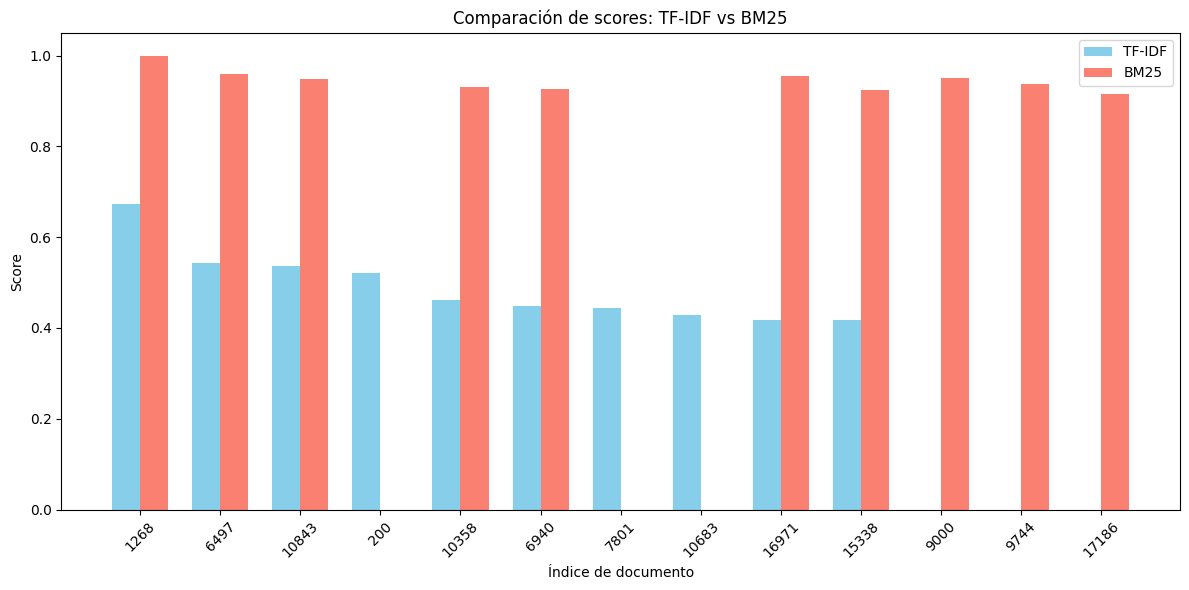

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scores_normalized = scaler.fit_transform(scores.reshape(-1, 1)).flatten()

# Obtener los índices de ranking de ambos modelos
top_k = 10  # puedes ajustar
ranking_tfidf = np.argsort(similaridades[0])[::-1][:top_k]
ranking_bm25 = np.argsort(scores_normalized)[::-1][:top_k]

# Crear DataFrames para comparar
df_tfidf = pd.DataFrame({
    'doc_index': ranking_tfidf,
    'score_tfidf': similaridades[0][ranking_tfidf]
})

df_bm25 = pd.DataFrame({
    'doc_index': ranking_bm25,
    'score_bm25': scores_normalized[ranking_bm25]
})

# Unir ambos rankings (outer join para conservar todos)
df_comparacion = pd.merge(df_tfidf, df_bm25, on='doc_index', how='outer').fillna(0)

# Ordenar por score combinado para visualización más coherente
df_comparacion.sort_values(by=["score_tfidf", "score_bm25"], ascending=False, inplace=True)

# Gráfico de comparación
x = np.arange(len(df_comparacion))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, df_comparacion['score_tfidf'], width, label='TF-IDF', color='skyblue')
plt.bar(x + width/2, df_comparacion['score_bm25'], width, label='BM25', color='salmon')

# Etiquetas
plt.xlabel('Índice de documento')
plt.ylabel('Score')
plt.title('Comparación de scores: TF-IDF vs BM25')
plt.xticks(x, df_comparacion['doc_index'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Parte 5: Evaluación con consulta relevante

### Actividad 

1. Elige una consulta y define qué documentos del corpus deberían considerarse relevantes.
2. Evalúa Precision@3 o MAP para los rankings generados con TF-IDF y BM25.
3. Responde: ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

In [40]:
# Consultas de ejemplo
query5 = "newton gravity"

In [50]:
#consulta tfidf
query_vect5 = vectorizer.transform([query5])
similaridades5 = cosine_similarity(query_vect5, tfidf) 
ranking_tfidf5 = np.argsort(similaridades5[0])[::-1]
top_k5 = 6  # ajustar
resultados5 = pd.DataFrame({
    "documento_index": ranking_tfidf5[:top_k5],
    "similitud": similaridades5[0][ranking_tfidf5[:top_k5]],
    "preview_200": [newsgroupsdocs[i][:200] + "..." for i in ranking_tfidf5[:top_k5]],
    "primeras_lineas": [
        "\n".join(newsgroupsdocs[i].splitlines()[:10]) + "\n..."
        for i in ranking_tfidf5[:top_k5]
    ]
})
print("Resultados TF-IDF para la consulta:", query5)
pd.set_option("display.max_colwidth", None)  # para que no corte las columnas   
print(resultados5)

Resultados TF-IDF para la consulta: newton gravity
   documento_index  similitud  \
0             5654   0.418876   
1            14115   0.377258   
2             2013   0.303081   
3            17333   0.293744   
4            14897   0.278749   
5            15823   0.189628   

                                                                                                                                                                                                        preview_200  \
0                                                                                                             \nGravity?  Doesn't gravity pull down the photons and cause a doppler shift\nor something?\n\n\n\n...   
1    \n    What do you accept as a fact --  the roundness of the earth (after \nall, the ancient Greeks thought it was a sphere, and then Newton said \nit was a spheroid, and now people say it's a geoid [?])?...   
2                                                                       

In [ ]:
print("---------------Documento 5654-----------------")
print(newsgroupsdocs[5654])
print("---------------Documento 14115-----------------")
print(newsgroupsdocs[14115])
print("---------------Documento 2013-----------------")
print(newsgroupsdocs[2013])
print("---------------Documento 17333-----------------")
print(newsgroupsdocs[17333])
print("---------------Documento 14897-----------------")
print(newsgroupsdocs[14897])
print("---------------Documento 15823-----------------")
print(newsgroupsdocs[15823])

---------------Documento 5654-----------------

Gravity?  Doesn't gravity pull down the photons and cause a doppler shift
or something?




---------------Documento 14115-----------------

    What do you accept as a fact --  the roundness of the earth (after 
all, the ancient Greeks thought it was a sphere, and then Newton said 
it was a spheroid, and now people say it's a geoid [?])?  yourself 
(isn't your personal identity just a theoretical construct to make 
sense of memories, feelings, perceptions)?  I'm trying to think of 
anything that would be a fact for you.  Give some examples, and let's
see how factual they are by your criteria (BTW, what are your
criteria?).

    "Gravity is _not_ a fact": is that a fact?  How about Newton's 
and Einstein's thoughts about gravity -- is it a fact that they had 
those thoughts?  I don't see how any of the things that you are 
asserting are any more factual than things like gravity, atoms or 
evolution.

    In short, before I am willing to c

In [51]:
#consulta bm25
tokenized_query = query5.lower().split()
scores5 = bm25.get_scores(tokenized_query)
ranking_bm25 = scores5.argsort()[::-1]
resultados_bm25 = pd.DataFrame({
    "documento_index": ranking_bm25[:top_k5],
    "score_bm25": [scores5[i] for i in ranking_bm25[:top_k5]],
    "preview_200": [newsgroupsdocs[i][:200] + "..." for i in ranking_bm25[:top_k5]],
    "primeras_lineas": [
        "\n".join(newsgroupsdocs[i].splitlines()[:10]) + "\n..."
        for i in ranking_bm25[:top_k5]
    ]
})  
print("Resultados BM25 para la consulta:", query5)
pd.set_option("display.max_colwidth", None)  # para que no corte las columnas   
print(resultados_bm25)



Resultados BM25 para la consulta: newton gravity
   documento_index  score_bm25  \
0            14115   20.266244   
1             5654   11.900046   
2            17333   11.041649   
3            10639   10.091968   
4            14897   10.081940   
5             2013    9.955034   

                                                                                                                                                                                                             preview_200  \
0         \n    What do you accept as a fact --  the roundness of the earth (after \nall, the ancient Greeks thought it was a sphere, and then Newton said \nit was a spheroid, and now people say it's a geoid [?])?...   
1                                                                                                                  \nGravity?  Doesn't gravity pull down the photons and cause a doppler shift\nor something?\n\n\n\n...   
2        \n\nThe gravity data is collected in real-t

In [43]:
print("---------------Documento 14115-----------------")
print(newsgroupsdocs[14115])
print("---------------Documento 5654-----------------")
print(newsgroupsdocs[5654])
print("---------------Documento 17333-----------------")
print(newsgroupsdocs[17333])
print("---------------Documento 110639-----------------")
print(newsgroupsdocs[10639])
print("---------------Documento 14897-----------------")
print(newsgroupsdocs[14897])
print("---------------Documento 2013-----------------")
print(newsgroupsdocs[2013])

---------------Documento 14115-----------------

    What do you accept as a fact --  the roundness of the earth (after 
all, the ancient Greeks thought it was a sphere, and then Newton said 
it was a spheroid, and now people say it's a geoid [?])?  yourself 
(isn't your personal identity just a theoretical construct to make 
sense of memories, feelings, perceptions)?  I'm trying to think of 
anything that would be a fact for you.  Give some examples, and let's
see how factual they are by your criteria (BTW, what are your
criteria?).

    "Gravity is _not_ a fact": is that a fact?  How about Newton's 
and Einstein's thoughts about gravity -- is it a fact that they had 
those thoughts?  I don't see how any of the things that you are 
asserting are any more factual than things like gravity, atoms or 
evolution.

    In short, before I am willing to consider your concept of what
a fact is, I'm going to have to have, as a minimum, some examples of
what you think are facts.

---------------

In [44]:
# Diccionarios de relevancia para comparar resultados
relevancia_tfidf = {
    5654: 0,
    14115: 1,
    2013: 0,
    17333: 0,
    14897: 0,
    15823: 1
    
}
relevancia_BM25 = {
    14115: 1,
    5654: 0,
    17333: 0,
    10639: 0,
    14897: 0,
    2013: 0  
}
# Unión de ambos rankings
relevancia_unificada = {
    5654: 0,
    14115: 1,
    2013: 0,
    17333: 0,
    14897: 0,
    15823: 1,
    10639: 0
}


In [45]:
def precision_at_k(ranking, relevancia_dict, k):
    top_k = ranking[:k]
    relevantes_en_top_k = sum([relevancia_dict.get(doc, 0) for doc in top_k])
    return relevantes_en_top_k / k

def average_precision(ranking, relevancia_dict):
    hits = 0
    precisions = []
    for i, doc_id in enumerate(ranking):
        if relevancia_dict.get(doc_id, 0):
            hits += 1
            precisions.append(hits / (i + 1))
    if not precisions:
        return 0.0
    return sum(precisions) / len(relevancia_dict)


In [54]:
# ranking_tfidf5 y ranking_bm25 
k = 6  # puedes ajustar este valor

# TF-IDF
precision_tfidf = precision_at_k(ranking_tfidf5, relevancia_unificada, k)
map_tfidf = average_precision(ranking_tfidf5, relevancia_unificada)

# BM25
precision_bm25 = precision_at_k(ranking_bm25, relevancia_unificada, k)
map_bm25 = average_precision(ranking_bm25, relevancia_unificada)

# Mostrar resultados
print(f"TF-IDF: Precision@{k} = {precision_tfidf:.2f}, MAP = {map_tfidf:.3f}")
print(f"BM25:   Precision@{k} = {precision_bm25:.2f}, MAP = {map_bm25:.3f}")


TF-IDF: Precision@6 = 0.33, MAP = 0.119
BM25:   Precision@6 = 0.17, MAP = 0.184


## ¿Cuál modelo da mejores resultados respecto a tu criterio de relevancia?

TF-IDF recuperó 2 documentos relevantes en el top 6 (Precision\@6 = 0.33), mientras que BM25 solo recuperó 1 (Precision\@6 = 0.17). A pesar de eso, BM25 obtuvo un MAP más alto (0.184 frente a 0.119), lo que indica que posicionó mejor al documento más relevante. Esto muestra que TF-IDF ofrece mayor cobertura en los resultados relevantes, mientras que BM25 es más efectivo para priorizar los documentos clave al inicio del ranking.
